In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("ecommerce_customer_data_large.csv")

In [5]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [7]:
data.shape

(250000, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [11]:
data.isna().any()

Customer ID              False
Purchase Date            False
Product Category         False
Product Price            False
Quantity                 False
Total Purchase Amount    False
Payment Method           False
Customer Age             False
Returns                   True
Customer Name            False
Age                      False
Gender                   False
Churn                    False
dtype: bool

In [13]:
data.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [15]:
data.dropna(inplace=True,axis=0)
print(data.isnull().sum())

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64


In [21]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [23]:
#4) Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?
top_customers_amount = data.groupby(['Customer ID', 'Customer Name'])['Total Purchase Amount'].sum()
top_customers_frequency = data.groupby(['Customer ID', 'Customer Name'])

In [25]:
top_customers_amount

Customer ID  Customer Name   
1            Dominic Cline        5148
2            Crystal Day         16481
3            Joseph Perez         4687
4            Wyatt Love           7826
5            Shannon Hoffman      7681
                                 ...  
49996        Cindy Holden        21762
49997        Anita Gardner        5714
49998        Tracy Smith         20495
49999        Laura Burgess       12709
50000        Kenneth Lawrence    19893
Name: Total Purchase Amount, Length: 49146, dtype: int64

In [27]:
top_customers_frequency

In [29]:
#1) What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])
monthly_sales = data.groupby(pd.Grouper(key='Purchase Date', freq='M'))['Total Purchase Amount'].sum()

C:\Users\radhi\AppData\Local\Temp\ipykernel_2948\3739886213.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.groupby(pd.Grouper(key='Purchase Date', freq='M'))['Total Purchase Amount'].sum()


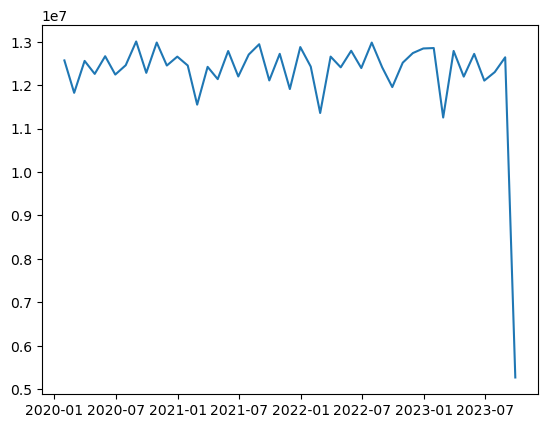

In [31]:
plt.plot(monthly_sales.index, monthly_sales.values)

In [43]:
#3) What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?
payment_method_sales = data.groupby('Payment Method')['Total Purchase Amount'].sum()
payment_method_frequency = data.groupby('Payment Method')['Customer ID'].nunique()

([<matplotlib.patches.Wedge at 0x1d8290882c0>,
 [Text(-0.948897214323781, 0.5564117869425202, 'Cash'),
  Text(-0.010456256646442537, -1.099950301921384, 'Credit Card'),
  Text(0.9541433686001691, 0.5473668168206051, 'PayPal')],
 [Text(-0.5175802987220623, 0.3034973383322837, '33.1%'),
  Text(-0.005703412716241383, -0.5999728919571184, '33.5%'),
  Text(0.520441837418274, 0.29856371826578454, '33.4%')])

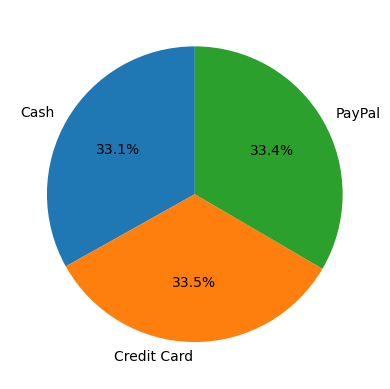

In [45]:
plt.pie(payment_method_sales, labels=payment_method_sales.index, autopct='%1.1f%%', startangle=90)

([<matplotlib.patches.Wedge at 0x1d8292b0110>,
 [Text(-0.9533636871953165, 0.5487236826831434, 'Cash'),
  Text(0.0028011035654846453, -1.0999964335482255, 'Credit Card'),
  Text(0.9519632944774589, 0.5511496039802832, 'PayPal')],
 [Text(-0.5200165566519908, 0.2993038269180782, '33.4%'),
  Text(0.0015278746720825335, -0.5999980546626683, '33.3%'),
  Text(0.5192527060786138, 0.3006270567165181, '33.3%')])

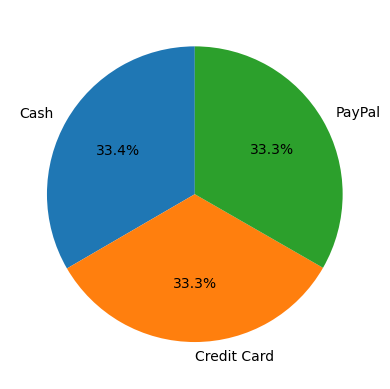

In [47]:
plt.pie(payment_method_frequency, labels=payment_method_frequency.index, autopct='%1.1f%%', startangle=90)